In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
f = fits.open("data/ebl_models/ebl_finke10.fits.gz")

In [3]:
f.info()

Filename: data/ebl_models/ebl_finke10.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  PARAMETERS    1 BinTableHDU     45   1R x 10C   [12A, J, E, E, E, E, E, E, J, PE(500)]   
  2  ENERGIES      1 BinTableHDU     19   99R x 2C   [E, E]   
  3  SPECTRA       1 BinTableHDU     19   500R x 2C   [1E, 99E]   


In [4]:
energy_ref = np.sqrt(f["ENERGIES"].data["ENERG_LO"] * f["ENERGIES"].data["ENERG_HI"])

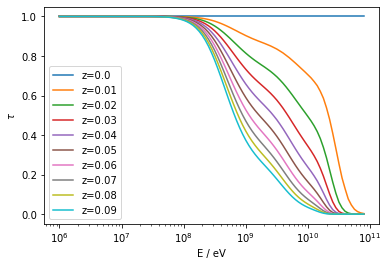

In [5]:
for spectra in f["SPECTRA"].data[:10]:
    plt.semilogx(energy_ref, spectra["INTPSPEC"], label="z=" + str(spectra["PARAMVAL"]))
plt.legend()
plt.xlabel("E / eV")
plt.ylabel(r"$\tau$")
plt.show()

In [6]:
values_ref = []
z_ref = []
for spectra in f["SPECTRA"].data:
    z_ref.append(spectra["PARAMVAL"])
    values_ref.append(spectra["INTPSPEC"])
z_ref = np.asarray(z_ref)
values_ref = np.asarray(values_ref)

In [7]:
# 2d interpolation
from scipy.interpolate import interp2d

In [8]:
log_energy_ref = np.log10(energy_ref)
model = interp2d(log_energy_ref, z_ref, values_ref, kind="linear")

In [9]:
def ebl_model(z, energy):
    """evaluate with the interpolated model"""
    log_energy = np.log10(energy)
    return model(log_energy, z)

In [10]:
def find_z_index(z): 
    """find the index among the spectra corresponding to this z"""
    return np.abs(z_ref - z).argmin()

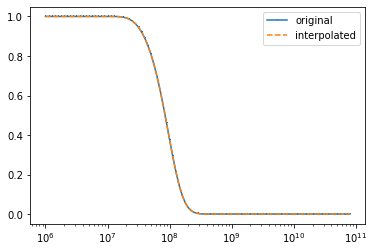

In [11]:
# original data
z = 1
z_idx = find_z_index(z)
spectra_ref = f["SPECTRA"].data[z_idx]["INTPSPEC"]
plt.semilogx(energy_ref, spectra_ref, ls="-", marker=",", label="original")
plt.semilogx(energy_ref, ebl_model(z, energy_ref), ls="--", label="interpolated")
plt.legend()
plt.show()

In [12]:
a = f["SPECTRA"].data["INTPSPEC"]

In [13]:
a.shape

(500, 99)